In [11]:
# 한글문제 해결
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

In [12]:
import mglearn
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트의 정확도 : 0.89
테스트 세트의 정확도 : 0.75


In [13]:
# 사용자는 alpha 매개변수로 훈련 센트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있다. (기본값 alpha=1.0)
# alpha값을 높이면 계수를 0에 더 가깝게 만들어 훈련세트의 성능은 나빠지지만 일반화에는 쉬워진다.
# alpha값을 바꿔서 확인해보자.

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트의 정확도 : 0.79
테스트 세트의 정확도 : 0.64


In [14]:
# 반대로 alpha값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 LinearRegression으로 만든 모델과 거의 같아진다.
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge01.score(X_test,y_test)))

훈련 세트의 정확도 : 0.93
테스트 세트의 정확도 : 0.77


C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


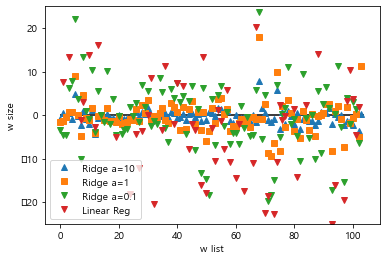

In [15]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.load_extended_boston()
# 훈련/테스트 데이터로 나누어 학습하기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
#alpha값에따른 coef_속성의 변화 확인하기 
#alpha값에 다른 coef속성(w)의 변화를 그래프로 확인해보자.
#alpha 매개변수가 모델을 어떻게 변경시키는지 이해할 수 있다.
#alpha값이 높으면 제약이 많으므로 작은값일 때 보다 절대값의 크기가 작을것이다.(일반화가 쉬워지므로)
plt.plot(ridge10.coef_,'^',label="Ridge a=10")
plt.plot(ridge.coef_,'s',label="Ridge a=1")
plt.plot(ridge01.coef_,'v',label="Ridge a=0.1")
plt.plot(lr.coef_,'v',label="Linear Reg")
plt.xlabel("w list")
plt.ylabel("w size")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()
plt.show()

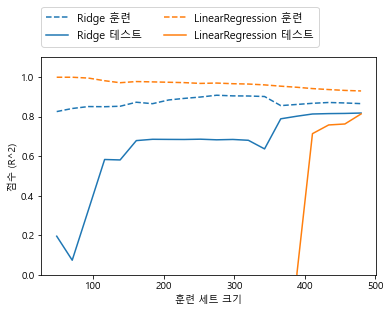

In [16]:
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ridge = Ridge().fit(X_train, y_train)
mglearn.plots.plot_ridge_n_samples()

위 그림을 보면 모든 데이터셋에 대해 릿지와 선형 회귀 모두 훈련세트의 점수가 테스트 세트의 점수보다 높다. 릿지 회귀에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮다.  
그러나 테스트 데이터에서는 릿지의 점수가 더 높으며, 특별히 작은 데이터셋에서는 더 그렇다.  
두 모델의 성능은 데이터가 많아질수로 졸아지고 마지막에는 선형 회귀가 릿지 회귀를 따라잡는다.  
=> 데이터를 충분히 주면 규제 항은 중요성이 떨어진다.

<라쏘 (Lasso)>

선형 회귀에 규제를 적용하는데 Ridge의 대안으로 Lasso가 있다.

릿지 회귀에서와 같이 라쏘도 계수를 0에 가깝게 만들려고 한다.

이를 L1규제라고 한다.

L1규제를 하면 어떤 계수는 정말 0이 된다. 

따라서 모델에서 완전히 제외되는 특성이 생긴다는 뜻이다.

In [19]:

X,y = mglearn.datasets.load_extended_boston()
print("X.shape : {}".format(X.shape))
# X.shape : (506, 104)
# 506개의 샘플과 104개의 특성

X.shape : (506, 104)


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso.n_iter_))
# 훈련 세트의 정확도 : 0.29
# 테스트 세트의 정확도 : 0.21
# 사용한 특성의 수 : 4
# 사용한 max_iter : 34
#Lasso는 훈련 세트와 테스트 세트 모두에서 결과가 좋지 않다.
#이는 과소적합이며, 104개의 특성 중 4개만 사용한 것을 볼 수있다

훈련 세트의 정확도 : 0.29
테스트 세트의 정확도 : 0.21
사용한 특성의 수 : 4
사용한 max_iter : 34


Ridge와 마찬가지로 Lasso도 계수를 얼마나 강하게 0으로 보낼지 조절하는 alpha 매개변수를 지원한다.
과소적합을 줄이기 위해서 alpha값을 줄여보자.
이렇게 하려면 max_iter 기본값을 늘려야 한다. (증가시키지 않으면 늘리라는 경고가 나온다.)

In [21]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso001.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso001.n_iter_))

# 훈련 세트의 정확도 : 0.90
# 테스트 세트의 정확도 : 0.77
# 사용한 특성의 수 : 33
# 사용한 max_iter : 1863

훈련 세트의 정확도 : 0.90
테스트 세트의 정확도 : 0.77
사용한 특성의 수 : 33
사용한 max_iter : 1863


In [22]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(lasso00001.score(X_train, y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(lasso00001.score(X_test, y_test)))

print("사용한 특성의 수 : {}".format(np.sum(lasso00001.coef_ != 0)))

print("사용한 max_iter : {}".format(lasso00001.n_iter_))

# 훈련 세트의 정확도 : 0.95

# 테스트 세트의 정확도 : 0.64

# 사용한 특성의 수 : 94

# 사용한 max_iter : 42005

훈련 세트의 정확도 : 0.95
테스트 세트의 정확도 : 0.64
사용한 특성의 수 : 94
사용한 max_iter : 42005


alpha값을 작게 할 수록 사용한 특성의 수를 보면 4->33->94개로 증가한것을 보면 된다.
alpha값을 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해진다.

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


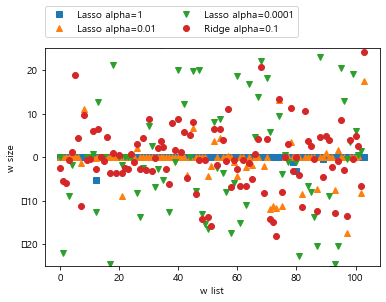

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 릿지 회귀
ridge = Ridge().fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

# 라쏘 회귀
lasso = Lasso().fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("w list")
plt.ylabel("w size")

# plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.show()

alpha=1일때 계수 대부분이 0일 뿐만 아니라 나머지 계수들도 크기가 작다는것을 알 수 있다.
alpha=0.01로 줄이면 대부분의 특성이 0이되는 분포를 얻게 된다.
alpha=0.0001로 줄이면 계수 대부분이 0이 아니고 값도 커져 꽤 규제받지 않은 모델을 얻게 된다.

Ridge 모델은 alpha=0.01인 라쏘 모델과 성능이 비슷하지만 Ridge를 사용하면 어떤 계수도 0이 되지 않는다.

실제로 이 두 모델 중 보통은 릿지 회귀를 선호한다.
하지만 특성이 많고 그중 일부분만 중요하다면 lasso가 더 좋은 선택일 수 있다.

scikit-learn은 Lasso와 Ridge의 패널티를 결합한 ElasticNet도 제공한다.
실제로 이 조합은 최상의 성능을 내지만 L1규제와 L2규제를 위한 매개변수 두개를 조정해야한다.

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


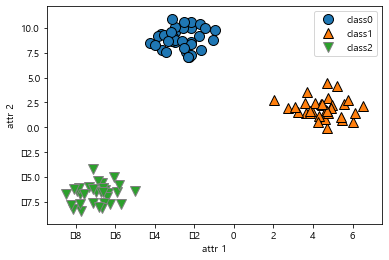

In [24]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_blobs
#데이터 셋 가져오기
#3개의 클래스 2차원 데이터 각 클래스의 데이터는 정규분포를 따른다
X,y=make_blobs(random_state=42)
#2차원 데이터의 산점도 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("attr 1")
plt.ylabel("attr 2")
plt.legend(["class0","class1","class2"])
plt.show()

In [25]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

# 데이터 셋 가져오기
# 3개의 클래스 2차원 데이터, 각 클래스의 데이터는 정규분포를 따른다.
X,y = make_blobs(random_state=42)

# Linaer SVC분류기로 훈련해보기
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기 : ",linear_svm.coef_.shape)
print("절편 배열의 크리 : ",linear_svm.intercept_.shape)
# 계수 배열의 크기 :  (3, 2)
# 절편 배열의 크리 :  (3,)

# coef의 크기는 (3,2)이므로 
# 행:3개의 클래스에 각각 대응하는 계수 벡터를 담고있다.
# 열:각 특성에 따른 계수값(2개)를 담고있다.
# intercept는 각 클래스의 절편을 담은 1차원 벡터이다.

계수 배열의 크기 :  (3, 2)
절편 배열의 크리 :  (3,)


C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


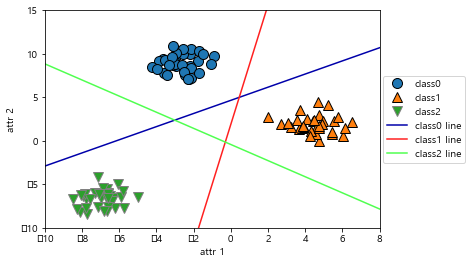

In [26]:
# 3개의 1:N 분류기가 만든 결졍 경계
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)    
plt.xlabel("attr 1")
plt.ylabel("attr 2")
plt.legend(["class0","class1","class2","class0 line","class1 line","class2 line"],loc=(1.01,0.3))  
plt.show() 

< 선형 모델 정리 >  
선형 모델의 주요 매개변수는   
회귀모델에서는 alpha였고, LinearSVC와 LogisticRegression에서는 C였다.  
alpha값이 클수록, C값이 작을수록 모델이 단순해진다.  
보통 C와 alpha는 로그스케일로 최적치를 정한다.(1->0.01,10,10000)  
그리고 L1규제를 사용할지 L2규제를 사용할지를 정해야 한다.  
중요한 특성이 많지 않으면 L1을 사용하고, 그렇지 않으면 기본적으로 L2를 사용한다.  
L1규제는 몇가지 특성만 사용하므로 모델에 중요한 특성이 무엇이고 효과가 어느정도인지 설명하기 쉽다.  
선형 모델은 학습 속도가 빠르고 예측이 빠르다.또한 다른 모델에 비해 이해하기 쉽다.  

선형 분류 알고리즘 
linear_model.LogisticRegression에 구현된 로지스틱 회귀
svm.LinearSVC에 구현된 선형 서포트 벡터 머신
이번 포스트에서는 위 두개중에 LogisticRegression에 대하여 알아보자.

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys : \n{}".format(cancer.keys()))
# cancer.keys : 
# dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
print("유방암 데이터의 형태 : {}".format(cancer.data.shape))
# 유방암 데이터의 형태 : (569, 30)
# 569개 데이터 포인트를 가지고 특성은 30개
print("클래스 별 샘플 개수 : \n {}".format({
    n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
# 클래스 별 샘플 개수 : 
#  {'malignant': 212, 'benign': 357}
# 569개 데이터 포인트 중 212개는 악성익 357개는 양성이다.
print("특성 이름 : {}\n".format(cancer.feature_names))
# 특성 이름 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
#  'mean smoothness' 'mean compactness' 'mean concavity'......
#  'worst concave points' 'worst symmetry' 'worst fractal dimension']
# 데이터에 관한 자세한 정보는 cancer.DESCR에서 확인할 수 있다.

cancer.keys : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
유방암 데이터의 형태 : (569, 30)
클래스 별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}
특성 이름 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']



2. 각기 다른 C값으로 학습시킨 모델의 성능확인

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()
# 훈련/테스트 세트로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))
# 훈련 세트 점수: 0.955
# 테스트 세트 점수: 0.958

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))
# 훈련 세트 점수: 0.972
# 테스트 세트 점수: 0.965

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))
# 훈련 세트 점수: 0.934
# 테스트 세트 점수: 0.930

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958
훈련 세트 점수: 0.972
테스트 세트 점수: 0.965
훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


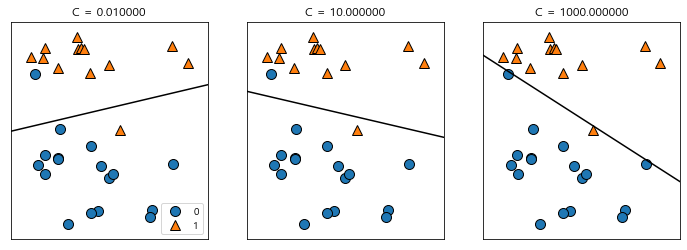

In [29]:
#2. LinearSVC에 C의 변화를 주어보자.
# 데이터 가져오기
X, y = mglearn.datasets.make_forge()
# forge 데이터 셋에 각기다른 C값으로 만든 SVM모델의 결졍경계

mglearn.plots.plot_linear_svc_regularization()

 나이브 베이즈 분류기 (naive bayes) 

In [30]:
X=np.array([[0,1,0,1],
           [1,0,1,1],
           [0,0,0,1],
           [1,0,1,0]])
y=np.array([0,1,0,1])

In [32]:
counts={}
for label in np.unique(y):
    #각클래스에 대해 반복
    #특성마다 1이 나타난 횟수를 센다
    counts[label]=X[y==label].sum(axis=0)
print("특성 카운트 :\n",counts)

특성 카운트 :
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


의사결정트리 시각화
**의사결정트리의 장점

다른 모델들에 비해 큰 수학적인 지식이 없어도 트리 그림을 보면

결정트리는 분류와 회귀문제에 널리 사용하는 모델이다.
2차원 데이터셋을 분류하는 결정 트리를 만들어보자.

결정 트리를 학습한다는것은 예/아니오 질문 목록을 학습한다는 것이다.
머신러닝에서는 이런 질문들을 테스트라고 한다.
연속적인 테이터에 적용할 테스트는 "특성i는 a값 보다 큰가?"와 같은 형태로 진행한다.

루트 노드 : 맨 위의 노드
순수 노드 : 타깃 하나로만 이뤄진 리프 노드

scikit-learn에서 결정 트리는 DecisionTreeRegression와 DecisionTreeClassifier에 구현되어있다.
scikit-learn은 사전 가지치기만 지원한다. 
(과대적합을 막는 전략에서 트리생성을 사전에 중단하는 전략, 사후 가지치기 : 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략)


의사결정 나무를 학습한다는 것은
정답에 가장 빨리 도달하는 트루폴스 질문목록을 학습하는 것입니다
머신러닝에서 이런 질문들을 test라 합니다
만약 tree를 만들때 모든 leafnode가 pure node가 될때 까지 진행하면 model의 complexity는 매우 높아지고
overfitting됩니다, 즉 reain set의 모든 데이터 포인트가 leaf node에 있다는 뜻입니다

overfitting을 막는 전략 2가지
1.tree 생성을 사전에 중단합니다:사전가지치기(pre-pruning)
2.데이터 포인트가 적은 node를 삭제하거나 병합합니다. 사후가지치기(post-pruning)
scikit-learn은 사전 가지치기만 지원

pip install graphviz

https://graphviz.gitlab.io/_pages/Download/Download_windows.html
graphviz-2.38.msi
다운
환경변수 입력

사용자 path: C:\Program Files (x86)\Graphviz2.38\bin
시스템 path: C:\Program Files (x86)\Graphviz2.38\bin\dot.exe

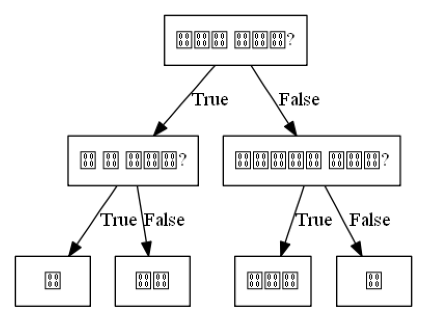

In [48]:
import matplotlib.pyplot as plt
import mglearn
mglearn.plots.plot_animal_tree()

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


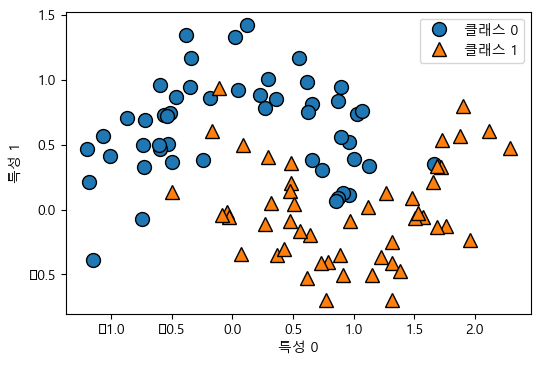

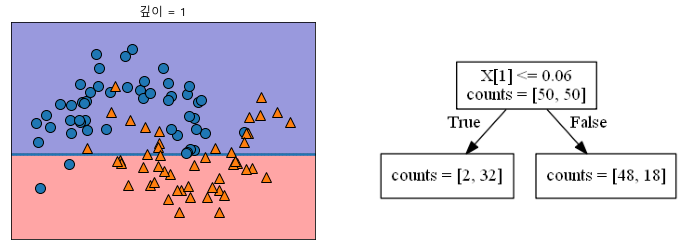

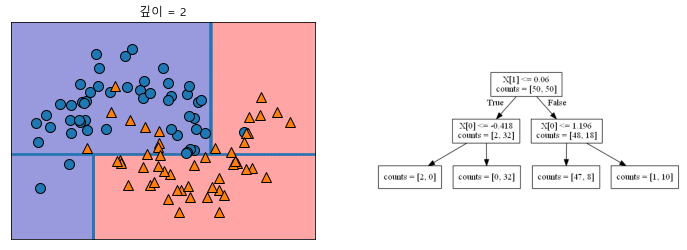

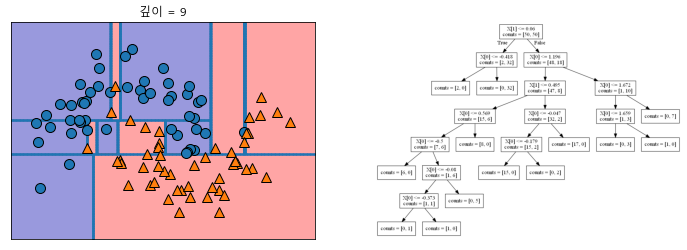

In [53]:
mglearn.plots.plot_tree_progressive()

In [54]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
# 훈련/테스트 세트로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
# 훈련 데이터로 학습 시키기
tree.fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수: 1.000
테스트 세트 점수: 0.937


모든 리프 노드가 순수 노드이므로 훈련 세트의 정확도는 100%이다.
즉, 트리는 훈련 데이터의 모든 레이블을 완벽하게 기억한다.
결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해진다.
그래서 가지치기하지 않은 트리는 과대적합되기 쉽고 일반화가 어렵다.

2. 사전 가지치기를 통한 학습 능력 판단하기

In [65]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
# 훈련/테스트 세트로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)

# 훈련 데이터로 학습 시키기
tree.fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수: 0.988
테스트 세트 점수: 0.951


이는 훈련 세트의 정확도를 떨어뜨리지만 테스트 세트의 성능은 개선된다.
이렇게 depth를 조절하여 과대적합을 막을 수 있다.

3. 트리 그래프 그리기

위에서 사용한 데이터셋의 트리그래프를 그려보자.
​트리 모듈의 export_graphviz 함수를 이용해 트리를 시각화 할 수 있다.
이 함수는 그래프 저장용 텍스트 파일 포맷인 .dot 파일을 만든다.
각 노드에서 다수인 클래스를 색으로 나타내기 위해 옵션(filled=True)을 주고 적절히 레이블 되도록 클래스 이름과 특성 이름을 매개변수로 전달한다.


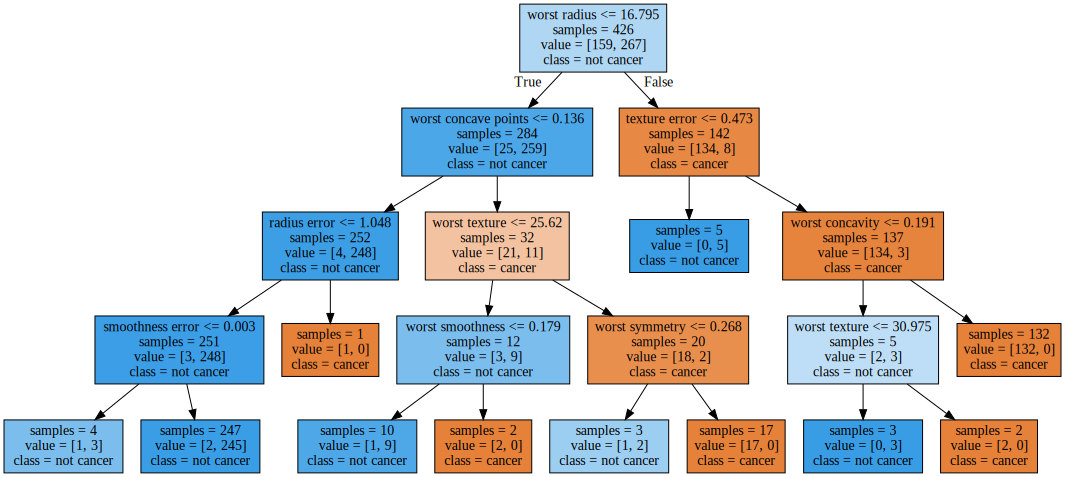

In [70]:
from IPython.display import display
import graphviz
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
# 훈련 데이터로 학습 시키기
tree.fit(X_train,y_train)
export_graphviz(tree, out_file="tree.dot",feature_names=cancer.feature_names, class_names=["cancer","not cancer"], filled=True, impurity=False)
#impurity=True 하면 지니지수가 나온다
with open("tree.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

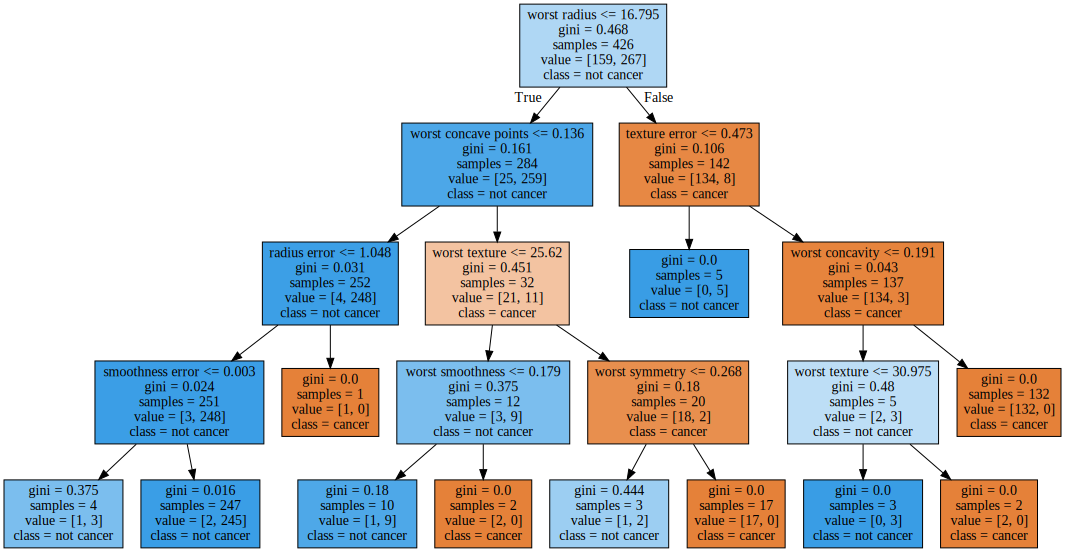

In [72]:
from IPython.display import display
import graphviz
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
# 훈련 데이터로 학습 시키기
tree.fit(X_train,y_train)
export_graphviz(tree, out_file="tree.dot",feature_names=cancer.feature_names, class_names=["cancer","not cancer"], filled=True, impurity=True)
with open("tree.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [75]:
dot=graphviz.Source(dot_graph)#dio_graph의 source저장
dot.render(filename="tree.png")

'tree.png.pdf'

samples노드안에 들어있는 데이터의 갯수
value분류값 별 데이터의 갯수
class:분류값
    트리를 시각화 하면 알고리즘의 예측이 어떻게 이뤄지는지 이해하기 좋다 하지만 트리의 depth가 깊어지면 보기가 힘들어진다
앞에서 보았듯이 데이터가 많아지고 트리의 depth가 깊어질 수록 이해하기 힘들다

특성의 중요도
0과 1사이의 숫자로 각 특성에 대해 0은 전혀 사용되지 않음을 의미하고 1은 완벽하게 타깃 클래스에 예측했다는 뜻이다 특성 중요도의 합은 1이다

1.트리의 중요도 확인하기


In [76]:
#특성 중요도
print("특성 중요도: \n:{}",format(tree.feature_importances_))

특성 중요도: 
:{} [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [ ]:
2. 특성 중요도 수평 막대그래프 그리기

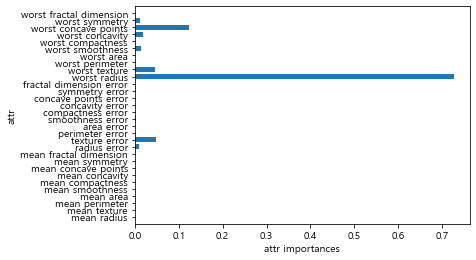

In [78]:
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1,n_features)

plot_feature_importances_cancer(tree)
plt.show()

그래프를 그려보면 worst_radius값이 제일 많이 사용되었음을 알 수 있다.
이로서 이전 포스트에서 확인했던 결정 트리 그래프에서 최상위 노드가 worst_radius 였던것을 확인하면 꽤 잘 나누고 있었다는 것을 뒷받침 해 줄 수 있다.

그러나 어떤 특성의 feature_importances_값이 낮다고 해서 유용하지 않다는 뜻은 아니다.
단지 트리가 그 특성을 선택하지 않았을 뿐 다른 특성이 동일한 정보를 가지고 있어서 일 수도 있다.
선형 모델의 계수와 달리, 특성 중요도는 항상 양수이다.

1. 램가격 데이터 가져와 그래프 그리기

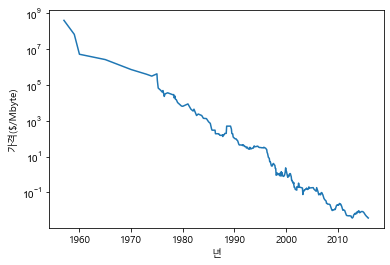

In [81]:
import pandas as pd
import mglearn
import os
import matplotlib.pyplot as plt
# path = mglearn.datasets.DATA_PATH
# ram_prices = pd.read_csv(os.path.join(path), "ram_price.csv")
# C:\Users\user\Anaconda3\Lib\site-packages\mglearn\data
ram_prices = pd.read_csv("../data/ram_price.csv")
plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격($/Mbyte)")
plt.show()

2. 두가지 모델로 예측한 2000년도 이후의 가격 그래프

날짜 특성 하나만으로 2000년 이후의 가격을 예측해보자
선형 회귀모델과 회귀 결정 트리 모델로 예측한 2000년도 이후의 가격 그래프를 그리고 비교 해보자.

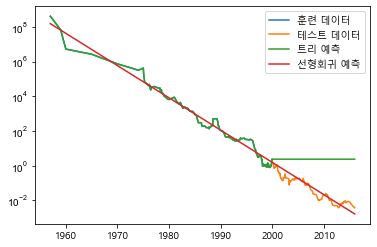

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


# 2000년 이전의 훈련 데이터로 2000년 이후 테스트데이터로 만들기
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]

# 가격 예측을 위해 날짜 특성만을 이용
X_train = data_train.date[:,np.newaxis]
# 데이터와 타깃의 관계를 간단하게 만들기 위해 로그 스케일로 바꾸기
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행하자.
X_all = ram_prices.date[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측값 다시 로그 스케일 되돌리기
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

두 모델(결정트리/선형회귀)은 확연한 차이를 보인다.

선형 모델은 우리가 아는대로 직선으로 데이터를 근사한다. 2000년대 이후를 꽤 정확이 예측한다.
반면에 트리모델은 훈련 데이터를 완벽하게 예측한다.
하지만, 트리의 복잡도에 제한을 두지 않아 전체 훈련 데이터를 기억하기 때문에 범위 밖의 데이터로 나가면서 마지막 포인트를 이용해 예측하는것이 전부이다.

이 트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없다.
이것은 모든 트리 기반 모델의 공통된 단점이다.

결정 트리 모델 정리
결정 트리에서 모델 복잡도를 조절하는 매개변수는 사전 가지치기 매개변수이다. (max_depth)

장점
1. 만들어진 모델을 쉽게 시각화 할수 있다.
2. 데이터의 스케일에 구애받지 않는다.
 각 특성이 개별적으로 처리되어 데이터를 분할하는데 영향을 받지 않는다.
3. 정규화나 표준화 같은 전처리 과정이 필요 없다.

단점
1. 사전 가지치기를 사용한다고 해도 과대적합이 될 수 있다. -> 일반화하기 힘들다.

위 사전 가지치기에도 과대 적합의 문제의 대안으로 앙상블 방법을 사용한다.

In [ ]:
붓꽃데이터를 로드하고 DecisionTree모델로 시각화해보세요

In [96]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data,iris_dataset.target,test_size=0.2,stratify=iris_dataset.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)

# 훈련 데이터로 학습 시키기
tree.fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수: 1.000
테스트 세트 점수: 0.967


In [108]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data,iris_dataset.target,test_size=0.2,stratify=iris_dataset.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0,max_depth=3)

# 훈련 데이터로 학습 시키기
tree.fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수: 0.983
테스트 세트 점수: 0.967


훈련 세트 점수: 0.983
테스트 세트 점수: 0.967


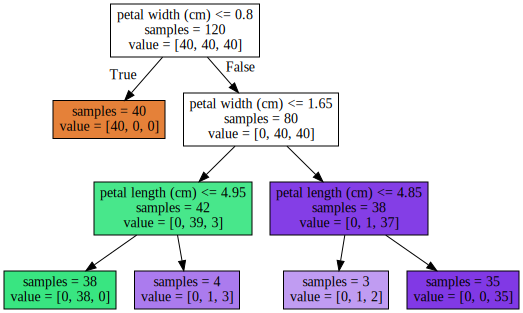

In [110]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data,iris_dataset.target,test_size=0.2,stratify=iris_dataset.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0,max_depth=3)

# 훈련 데이터로 학습 시키기
tree.fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

export_graphviz(tree, out_file="tree.dot",feature_names=iris_dataset.feature_names, filled=True, impurity=False)



with open("tree.dot") as f :

    dot_graph = f.read()

display(graphviz.Source(dot_graph))

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']